# lesson 4-2 SVD矩阵分解与基于内容的推荐

## Thinking1 奇异值分解SVD的原理是怎样的，都有哪些应用场景
- 对于一个非对称,维度为M*N的矩阵A,经过转置与运算,最后分解为 𝐴=𝑃Λ𝑄^𝑇 其中P为 m*m 的左奇异矩阵,Q为n*n维的右奇异矩阵,Λ对角线上的非零矩阵为特征值,用过对于特征值大小进行排序,数值较大的便是重要的特征值.对于特征矩阵,如果只取部分重要的特征值,即可以用少量信息来还原原矩阵的大部分信息.
- SVD主要应用在推荐系统中,其中P即是用户矩阵,Q是物品矩阵.
- SVD也可以用于图像的信息压缩。对图像信息进行SVD分解，再从大到小排序选择最高的部分特征值,重新进行矩阵乘法来还原图像,在损失较少图像信息的前提下大幅减少图像数据量.

## Thinking2 funkSVD, BiasSVD，SVD++算法之间的区别是怎样的
- funkSVD 对于原有矩阵近似求解𝑀_(𝑚×𝑛)≈𝑃_(𝑚×𝑘)^𝑇 𝑄_(𝑘×𝑛).避开稀疏问题，而且只用两个矩阵进行相乘,则损失函数即为P和Q矩阵乘积得到的评分，与实际用户评分之差 ∑_(𝑖,𝑗)=(𝑚_𝑖𝑗−𝑞_𝑗^𝑇 𝑝_𝑖 )^2  在实际应用中，为了防止过拟合，会加入一个L2的正则化项.通过梯度下降法求得P和Q,那么对于任意矩阵M任意一个空白评分的位置，可以通过计算qTjpiq_{j}^{T}p_{i}q 预测评分

- BiasSVD 使用前提是用户有自己的偏好(Bias)，比如乐观的用户打分偏高.商品也有自己的偏好(Bias)，比如质量好的商品，打分偏高.先将为与个性化无关的部分,设置为偏好, 所以其优化目标函数为arg⁡min┬(𝑝_𝑖 𝑞_𝑗 )  ∑_((𝑖,𝑗)∈𝐾)(𝑚_𝑖𝑗−𝜇−𝑏_𝑖−𝑏_𝑗−𝑞_𝑗^𝑇 𝑝_𝑖 )^2 +𝜆(‖𝑝_𝑖 ‖_2^2+‖𝑞_𝑗 ‖_2^2+‖𝑏_𝑖 ‖_2^2+‖𝑏_𝑗 ‖_2^2 )而优化目标函数的方式也是梯度下降法.

- SVD++算法就是在BiasSVD算法上进一步做优化，增加考虑用户的隐式反馈。这个用户对某个物品j对应的隐式反馈修正的评分值为𝑐_𝑖𝑗，那么该用户所有的评分修正值为∑_(𝑠∈𝑁(𝑖))▒𝑐_𝑠𝑗 ，一般我们将它表示为用形式，则加入了隐式反馈项以后的优化目标函数是这样的: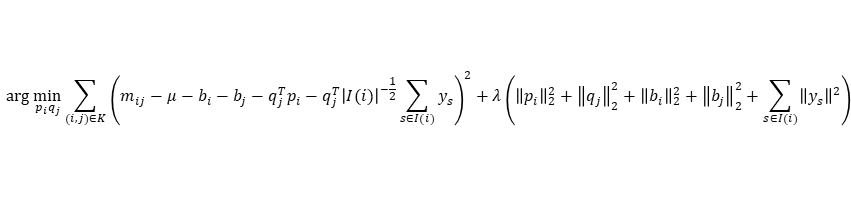  同样使用梯度下降法优化目标函数

## Thinking3 矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足
- 通过先择少量重要的特征值k,来对评分矩阵进行降维,对其进行近似还原
- SVD要求矩阵是稠密的,而实际矩阵往往是稀疏的,有大量缺失值
- SVD填充会造成噪音
- 矩阵分解只能同时考虑两个维度

## Thinking4 假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看了某部小说后，推荐其他相关的小说。原理和步骤是怎样的
- 首先计算该小说网站所有小说摘要的文本特征向量
- 再根据该客户所看小说摘要的特征向量计算与其他所有小说的余弦相似度,取相似度最大的TOP-N个小说进行推荐.

## Thinking5 Word2Vec的应用场景有哪些
Word2Vec 是通过embedding 的方式,把原先词所在的空间映射到一个新的空间中去,使得语义上相似的词能在该空间内距离相近    
利用word2vec可以计算词与词之间的相似度,从而进一步计算文本之间的相似度,从而在文章推荐,商品(通过关键词,描述等)推荐以及自动机器人客服等场景下进行应用.


## Action1 选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

1100

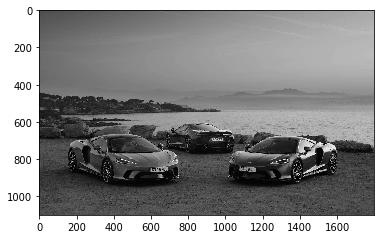

In [4]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt
# 加载图片
image_temp = Image.open('mclaren1.bmp') 
# 图片灰度化
image= image_temp.convert('L')
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
# plt.show()
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)

s.shape[0]

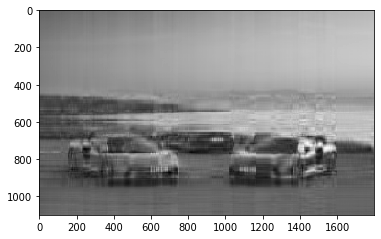

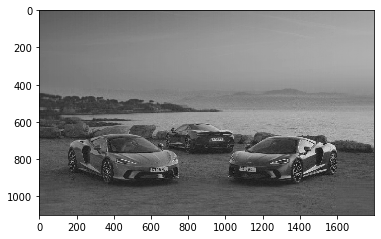

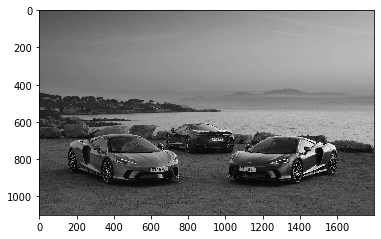

In [3]:
def get_image (s,k):
    #对于奇异值s,保留前k个特征
    temp_s = np.zeros(s.shape[0])
    temp_s[:k]=s[:k]
    s = temp_s * np.identity(s.shape[0])
    #以新的奇异值矩阵,重新构建图像矩阵A
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    
get_image(s,11)
get_image(s,110)
get_image(s,550)


## Action2 使用Google Colab编辑器，对MovieLens数据集进行评分预测，计算RMSE（使用funkSVD, BiasSVD，SVD++）


In [ ]:
#以下代码在google colab中运行
!pip install surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd
import time


from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")



# 数据读取
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
train_set = data.build_full_trainset()

![jupyter](./colab_1.png)

In [ ]:
# 使用funkSVD
time1=time.time()
algo = SVD(biased=False,verbose = True)

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)
time2=time.time()
print(time2-time1)

![jupyter](./colab_2.png)

In [ ]:
# 使用BiasSVD
time1 = time.time()
algo = SVD(biased=True)

# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)
time2=time.time()
print(time2-time1)

![jupyter](./colab_3.png)

In [ ]:
# 使用SVD++   注: 使用svd++算法训练时间超级长 只能选择epoch = 3 做示例
time1=time.time()
from surprise import SVDpp
algo = SVDpp(verbose = True,n_epochs= 3)
# 定义K折交叉验证迭代器，K=3
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    accuracy.rmse(predictions, verbose=True)

uid = str(196)
iid = str(302)
# 输出uid对iid的预测结果
pred = algo.predict(uid, iid, r_ui=4, verbose=True)
time2=time.time()
print(time2-time1)

![jupyter](./colab_4.png)

## Action3 "使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=?
数据集：three_kingdoms.txt"

In [2]:
import jieba
import os
from utils import files_processing

# 源文件所在目录
source_folder = './three_kingdoms/source'
segment_folder = './three_kingdoms/segment'

# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list,segment_out_dir,stopwords=[]):
    for i,file in enumerate(file_list):
        segment_out_name=os.path.join(segment_out_dir,'segment_{}.txt'.format(i))
        with open(file, 'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment=[]
            for word in document_cut:
                if word not in stopwords:
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name, 'wb') as f2:
                f2.write(result)

# 对source中的txt文件进行分词，输出到segment目录中
file_list=files_processing.get_files_list(source_folder, postfix='*.txt')
segment_lines(file_list, segment_folder)


d:\Users\rexcase\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\Users\rexcase\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\Users\rexcase\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\rexcase\AppData\Local\Temp\jieba.cache
Loading model cost 0.556 seconds.
Prefix dict has been built successfully.


In [8]:
from gensim.models import word2vec
import multiprocessing


# 如果目录中有多个文件，可以使用PathLineSentences

segment_folder = './three_kingdoms/segment'
sentences = word2vec.PathLineSentences(segment_folder)
#调整模型参数进行训练
model2 = word2vec.Word2Vec(sentences, size = 128, window = 5, min_count = 6,
                         workers = multiprocessing.cpu_count() )
#保存模型
model2.save('./word2Vec.model')
print('曹操-曹丕相似性',model2.wv.similarity('曹操','曹丕'))
print('曹操-主公相似性',model2.wv.similarity('曹操','主公'))
print('曹操-朕似性',model2.wv.similarity('曹操','朕'))
print(model2.wv.most_similar(positive = ['曹操','刘备'], negative = ['张飞']))

曹操-曹丕相似性 0.9515842
曹操-主公相似性 0.77572626
曹操-朕似性 0.7699578
[('今', 0.989226222038269), ('臣', 0.9887192249298096), ('丞相', 0.9865387678146362), ('吾', 0.9858066439628601), ('朕', 0.9853366613388062), ('陛下', 0.983126163482666), ('非', 0.9824337959289551), ('一人出', 0.9823833703994751), ('谁', 0.9815787672996521), ('之见', 0.9807436466217041)]
